word2vec is a technique for encoding words (or other tokens in a sequence) into high dimensional vectors. These vectors can be used for similarity lookups and arithmetic operations. The word2vec algorithm is implemented by [gensim](https://radimrehurek.com/gensim/).

In [1]:
from gensim.models import Word2Vec

Instead of spending days training our own model on lots of text, we can load a pre-trained model. This one was [trained by Google](https://code.google.com/p/word2vec/) on three million unique words and phrases in news articles. Each word is embedded in a 300-dimensional space. It's a 3.6GB file (compressed to 1.6GB) and can take almost two minutes to load this model from disk.

In [2]:
model = Word2Vec.load_word2vec_format('models/GoogleNews-vectors-negative300.bin.gz', binary=True)

We can look up the vector for a single word like this:

In [3]:
vector = model['Germany']
print(vector.shape)

(300,)


/Users/raminsoleymani/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


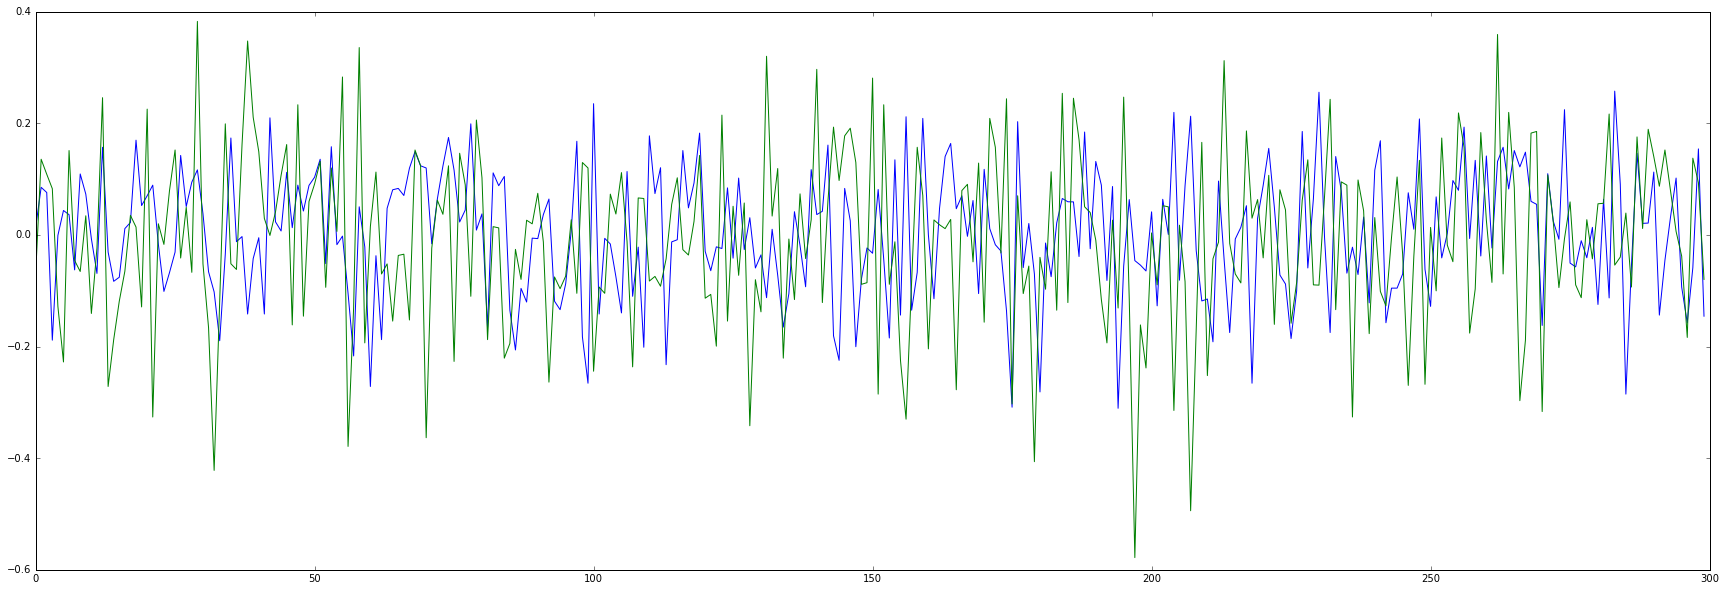

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[30, 10])
plt.plot(vector)
plt.plot(model['China'])
plt.show()

In [25]:
from textblob import TextBlob

def word_similar_cosmul_p(word,topn=10, do_print = True,words_only = False):
    if do_print: print "word:",word
    similarities = model.most_similar_cosmul([word],[],topn)
    if do_print: print_similarities(similarities)    
    if words_only:
        similarities = map(lambda sim : sim[0],similarities)
    return similarities  

def print_similarities(similarity_list):
    for similarity in similarity_list:
        print similarity[0].ljust(18),similarity[1]
        
def tag(word):
    return TextBlob(word).tags[0]
#print tag('win')

If we sort the dimensions by one vector, we can see the similar words follow it, and the dissimilar one does not.

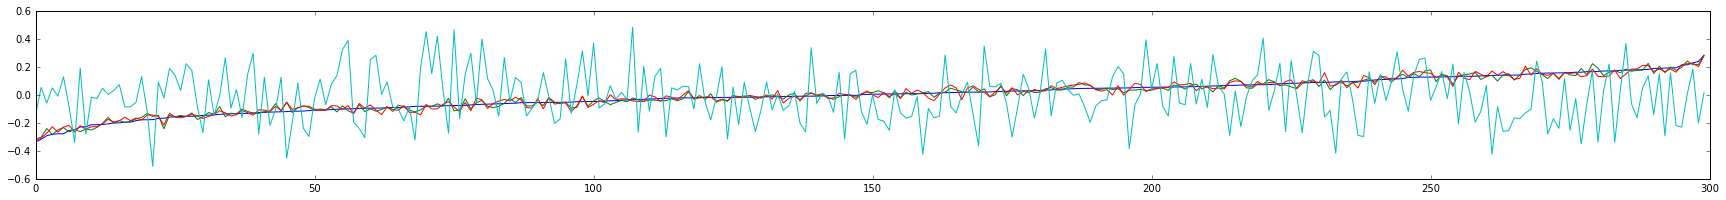

In [6]:
plt.figure(figsize=[30, 3])
plt.plot(sorted(zip(model['Tuesday'], model['Wednesday'], model['Thursday'], model['teapot'])))
plt.show()

Using these vectors we can make metaphors, such as "What is the Berlin of Japan (instead of Germany)?" also written:
`Berlin + Japan - Germany`:

In [12]:
model.most_similar(positive=['Berlin', 'Japan'], negative=['Germany'])

[(u'Tokyo', 0.7485347986221313),
 (u'Toyko', 0.6140642166137695),
 (u'Japanese', 0.5829421877861023),
 (u'Seoul', 0.5801318883895874),
 (u'Fukuoka', 0.5745269656181335),
 (u'Nagoya', 0.5597074031829834),
 (u'Aomori', 0.5552585124969482),
 (u'Osaka', 0.5507832765579224),
 (u'Tsuruoka', 0.5430541634559631),
 (u'Ishihara', 0.5422928333282471)]

Or, "What is a queen as a man (instead of a woman)?" Notice that the words are case sensitive.
`queen + man - woman`

In [13]:
model.most_similar(positive=['queen', 'man'], negative=['woman'])

[(u'king', 0.6958590149879456),
 (u'kings', 0.5950952768325806),
 (u'queens', 0.5838501453399658),
 (u'monarch', 0.5398427248001099),
 (u'prince', 0.5223615169525146),
 (u'princess', 0.5175285339355469),
 (u'princes', 0.49844634532928467),
 (u'royal', 0.4924592971801758),
 (u'NYC_anglophiles_aflutter', 0.4859851002693176),
 (u'Eugene_Ionesco_absurdist_comedy', 0.4784241318702698)]

We can look for the most similar words in the 1000 most common words.

In [124]:
limit = 1000
limited = model.index2word[:limit]
matches = [(model.most_similar(positive=[word], topn=1, restrict_vocab=limit)[0], word) for word in limited]
sorted([(x[1],x[0],y) for x,y in matches], reverse=True)[:200]

[(0.98166823387146, u'Wednesday', u'Thursday'),
 (0.98166823387146, u'Thursday', u'Wednesday'),
 (0.979229211807251, u'Wednesday', u'Tuesday'),
 (0.9720568656921387, u'Tuesday', u'Monday'),
 (0.9703431129455566, u'three', u'four'),
 (0.9703431129455566, u'four', u'three'),
 (0.9675939679145813, u'January', u'February'),
 (0.9675939083099365, u'February', u'January'),
 (0.963593602180481, u'February', u'October'),
 (0.9619012475013733, u'seven', u'eight'),
 (0.9619012475013733, u'eight', u'seven'),
 (0.9616836309432983, u'May', u'April'),
 (0.9616836309432983, u'April', u'May'),
 (0.9606298208236694, u'four', u'five'),
 (0.9601358771324158, u'April', u'March'),
 (0.9579434394836426, u'October', u'August'),
 (0.9557317495346069, u'June', u'July'),
 (0.9557317495346069, u'July', u'June'),
 (0.9544944763183594, u'October', u'September'),
 (0.9543241858482361, u'3', u'2'),
 (0.9543241858482361, u'2', u'3'),
 (0.9529384970664978, u'6', u'5'),
 (0.9529384970664978, u'5', u'6'),
 (0.9525634646

gensim also provides interfaces for how similar two words are.

In [14]:
model.similarity('computer', 'calculator')

0.333988819665892

In [15]:
model.similarity('computer', 'rain')

0.060617714645925552

Or which words don't belong, like "[Which one of these things is not like the other](https://www.youtube.com/watch?v=gCxrkl2igGY)".

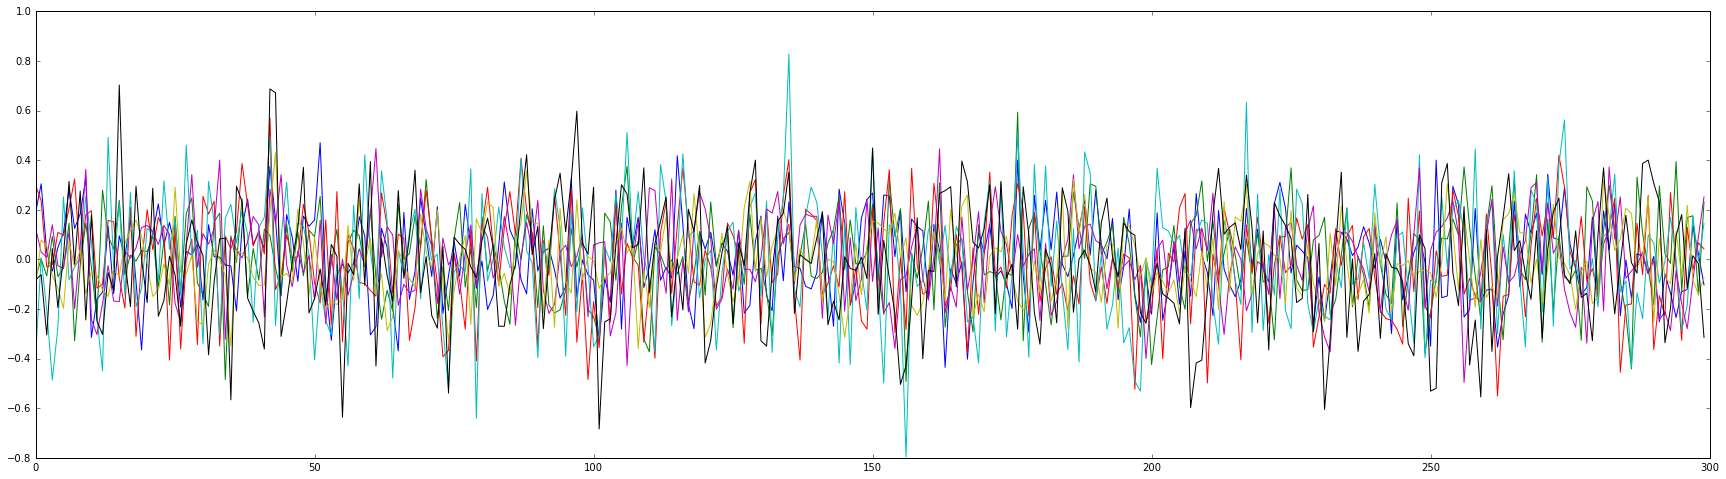

'king'

In [12]:
plt.figure(figsize=[30, 8])
words = ['hammer','shoe','handsaw','pliers','king','space','astronaut']
for word in words:        
    plt.plot(model[word])
plt.show()
not_watch = model.doesnt_match(words) # try "saw" instead

sentence generation method:
from the non-stop words replace the last matching word with same tag &: similar , different sentinement, translation to another area.

In [ ]:
not_watch

In [44]:
model.doesnt_match("sweet sour salty wet".split()) # add umami

'wet'

As you work with word2vec you will notice that opposites are more similar to each other than they are to very different things:

In [45]:
model.similarity('hot', 'cold')

0.71900512146338558

In [49]:
model.similarity('hot', 'laptop')

0.091948770182133571

For a set of words we can plot their similarities to each other, and see that each group of three is similar to each other but not to the others.

In [4]:
import numpy as np

# words = [str(i) for i in range(9)]
# words = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth', 'tenth', 'eleventh', 'twelfth']
# words = ['January','February','March','April','May','June','July','August','September','October','November','December']
words = ['Monday', 'Britian', 'Cool', 'Barcelona', 'Tango', 'Art', 'Friday']
# words = ['breakfast', 'lunch', 'dinner','computer', 'desktop', 'laptop','sun', 'moon', 'stars']
vectors = [model[word] for word in words]
similar = [np.dot(vectors, vector) for vector in vectors]

plt.figure(figsize=(8, 6))
plt.pcolor(np.array(similar), cmap='viridis')
plt.colorbar()
plt.yticks(0.5 + np.arange(len(words)), words)
plt.xticks(0.5 + np.arange(len(words)), '' * len(words))
plt.show()

NameError: name 'plt' is not defined

Another idea is to find a path from one word to another. Instead of doing a linear interpolation from one vector to another, we need to do a high-dimensional spherical interpolation. This example uses code from [Transorthogonal Linguistics](https://github.com/thoppe/transorthogonal-linguistics/blob/master/transorthogonal_linguistics/slerp_word_path.py). They do some extra filtering to get better results, and you can test it [here](http://transorthogonal-linguistics.herokuapp.com/TOL/boy/man).

In [41]:
from gensim import matutils
def slerp_points(x0,x1,slerp_n):
    theta = np.arccos(x0.dot(x1))
    st = np.sin(theta)
    T  = np.linspace(0,1,slerp_n)
    L1 = np.sin((1-T)*theta)/st
    L2 = np.sin(T*theta)/st
    SL = np.outer(L1,x0) + np.outer(L2,x1)
    return (SL.T / np.linalg.norm(SL,axis=1)).T

def print_path(start, end, steps=10, limit=10000, topn=10):
    x0 = model[start]
    x1 = model[end]
    all_words = [start, end]
    between = slerp_points(x0, x1, steps)
    limited = model.syn0norm if limit is None else model.syn0norm[:limit]
    for x in between:
        sims = np.dot(limited, matutils.unitvec(x))
        best = matutils.argsort(sims, topn=topn, reverse=True)
        print ' '.join([model.index2word[i] for i in best if not model.index2word[i] in all_words])

In [45]:
print_path('man', 'woman')

PlayMesh_recently launched_iFarm Ajay_Waghray U9_Girls bloody_dogfighting_ring meteorologist_Shawn_Ferreria Iordanis justice_Duncan_Ouseley Malku_Khota_Silver micro_nutrient_deficiencies
PlayMesh_recently launched_iFarm Ajay_Waghray U9_Girls bloody_dogfighting_ring meteorologist_Shawn_Ferreria Iordanis justice_Duncan_Ouseley Malku_Khota_Silver micro_nutrient_deficiencies
PlayMesh_recently launched_iFarm Ajay_Waghray U9_Girls bloody_dogfighting_ring meteorologist_Shawn_Ferreria Iordanis justice_Duncan_Ouseley Malku_Khota_Silver micro_nutrient_deficiencies
PlayMesh_recently launched_iFarm Ajay_Waghray U9_Girls bloody_dogfighting_ring meteorologist_Shawn_Ferreria Iordanis justice_Duncan_Ouseley Malku_Khota_Silver micro_nutrient_deficiencies
PlayMesh_recently launched_iFarm Ajay_Waghray U9_Girls bloody_dogfighting_ring meteorologist_Shawn_Ferreria Iordanis justice_Duncan_Ouseley Malku_Khota_Silver micro_nutrient_deficiencies
PlayMesh_recently launched_iFarm Ajay_Waghray U9_Girls bloody_dog

If you have a set of words you can sort them so that the path from one word to the next is always similar. This can be done with a traveling salesperson solver, like [this one in Python](https://github.com/dmishin/tsp-solver) or [this one from Google](https://developers.google.com/optimization/routing/tsp?hl=en). Here's a [list of moods](https://gist.github.com/kylemcdonald/e425243c41b2c41de5ba) sorted by a traveling salesperson solver their word2vec vector distance: `...fearless courageous brave daring bold framed blank fake phony inflated manipulated...`

We can also use PCA or t-SNE to plot a collection of word2vec vectors in 2d. Let's see if there is a principle axis that the "capital city" relationship exists along.

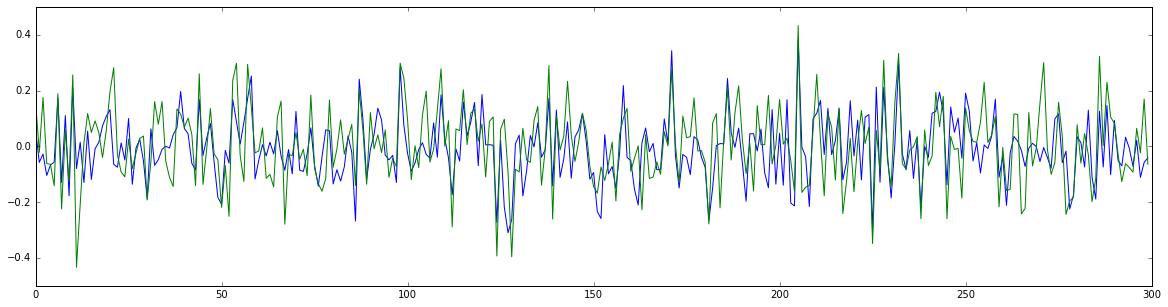

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(model['China']-model['Beijing'])
plt.plot(model['Japan']-model['Tokyo'])
# plt.plot(model['man']-model['woman'])
plt.show()

In [79]:
'''
pairs = [
    'China', 'Beijing',
    'Japan', 'Tokyo',
    'Russia', 'Moscow',
    'South_Korea', 'Seoul',
    'Indonesia', 'Jakarta',
    'United_Kingdom', 'London',
    'Peru', 'Lima',
    'Thailand', 'Bangkok',
    'Iran', 'Tehran',
    'Egypt', 'Cairo',
    'Germany','Berlin',
    'Barcelona', 'Berlin']
'''
pairs = [
   'good','better',
    'fast','faster',
    'big','bigger',
    'small',model.most_similar(positive=['better', 'small'], negative=['good'])[0][0]]
# pairs = [
#     'eyes', 'glasses',
#     'hand', 'pencil',
#     'head', 'hat',
#     'feet', 'shoes',
#     'legs', 'pants']
pairs_vectors = [model[pair] for pair in pairs]

In [80]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pairs_pca = pca.fit_transform(pairs_vectors)

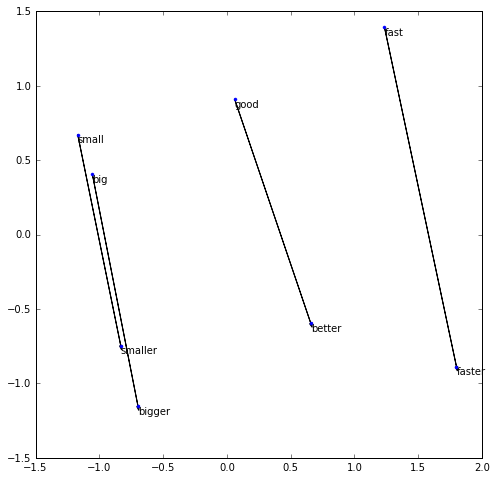

In [81]:
plt.figure(figsize=(8,8))
plt.plot(pairs_pca[:,0], pairs_pca[:,1], '.')
pair_pts = zip(pairs_pca[::2], pairs_pca[1::2])
pair_names = zip(pairs[::2], pairs[1::2])
for pt_pair, name_pair in zip(pair_pts, pair_names):
    pt0, pt1 = pt_pair
    plt.arrow(pt0[0], pt0[1], pt1[0]-pt0[0], pt1[1]-pt0[1])
    name0, name1 = name_pair
    plt.annotate(name0, pt0, va='top')
    plt.annotate(name1, pt1, va='top')
plt.show()

If you look at the relationship between a bunch of countries, you'll see the most related countries ending up next to each other. _Note: Some Countries are missing because they're not in word2vec._ For more words check out [corpora](https://github.com/dariusk/corpora).

In [203]:
words = []
with open('data/animals.txt') as f:
    words = [line.strip() for line in f]
print(len(words))
print(words)

133
['aardvark', 'alligator', 'alpaca', 'antelope', 'ape', 'armadillo', 'baboon', 'badger', 'bat', 'bear', 'beaver', 'bison', 'boar', 'buffalo', 'bull', 'camel', 'canary', 'capybara', 'cat', 'chameleon', 'cheetah', 'chimpanzee', 'chinchilla', 'chipmunk', 'cougar', 'cow', 'coyote', 'crocodile', 'crow', 'deer', 'dingo', 'dog', 'donkey', 'dromedary', 'elephant', 'elk', 'ewe', 'ferret', 'finch', 'fish', 'fox', 'frog', 'gazelle', 'gila_monster', 'giraffe', 'gnu', 'goat', 'gopher', 'gorilla', 'grizzly_bear', 'groundhog', 'guinea_pig', 'hamster', 'hedgehog', 'hippopotamus', 'hog', 'horse', 'hyena', 'ibex', 'iguana', 'impala', 'jackal', 'jaguar', 'kangaroo', 'koala', 'lamb', 'lemur', 'leopard', 'lion', 'lizard', 'llama', 'lynx', 'mandrill', 'marmoset', 'mink', 'mole', 'mongoose', 'monkey', 'moose', 'mountain_goat', 'mouse', 'mule', 'muskrat', 'mustang', 'mynah_bird', 'newt', 'ocelot', 'opossum', 'orangutan', 'oryx', 'otter', 'ox', 'panda', 'panther', 'parakeet', 'parrot', 'pig', 'platypus', 'p

In [26]:
from textblob import Word

words_vectors = []
print len(words)
print ">>>"
#add_similars(words,n)
max_words = len(words) * 2
for word in words:
    try:
        print len(words),max_words

        word_tag = tag(word)
        token = word.replace(' ', '_')
        words_vectors.append(model[token])
        #similar = model.most_similar(positive=['queen', 'man'], negative=['woman'])
        similar_words = word_similar_cosmul_p(word,do_print = False)
        for sim in similar_words:
            # print sim
            single = Word(sim[0]).singularize()
            
            if tag(single)[1] == word_tag[1] and single != word and sim[1] > 0.7:       
                words_vectors.append(model[single])
                words.append(single)
                #print ">>",single
                if max_words <= len(words):
                    break
        if max_words <= len(words):
            break
    except KeyError:
        print 'Ignoring "' + word + '"'
        
print len(words),words

7
>>>
7 14
Ignoring "hammer"
7 14
14 ['hammer', 'shoe', 'handsaw', 'pliers', 'king', 'space', 'astronaut', u'footwear', u'sneaker', u'Shoe', u'sandal', u'sneaker', u'slipper', u'sandal']


In [191]:
print len(words),words

13277 ['aardvark', 'alligator', 'alpaca', 'antelope', 'ape', 'armadillo', 'baboon', 'badger', 'bat', 'bear', 'beaver', 'bison', 'boar', 'buffalo', 'bull', 'camel', 'canary', 'capybara', 'cat', 'chameleon', 'cheetah', 'chimpanzee', 'chinchilla', 'chipmunk', 'cougar', 'cow', 'coyote', 'crocodile', 'crow', 'deer', 'dingo', 'dog', 'donkey', 'dromedary', 'elephant', 'elk', 'ewe', 'ferret', 'finch', 'fish', 'fox', 'frog', 'gazelle', 'gila_monster', 'giraffe', 'gnu', 'goat', 'gopher', 'gorilla', 'grizzly_bear', 'groundhog', 'guinea_pig', 'hamster', 'hedgehog', 'hippopotamus', 'hog', 'horse', 'hyena', 'ibex', 'iguana', 'impala', 'jackal', 'jaguar', 'kangaroo', 'koala', 'lamb', 'lemur', 'leopard', 'lion', 'lizard', 'llama', 'lynx', 'mandrill', 'marmoset', 'mink', 'mole', 'mongoose', 'monkey', 'moose', 'mountain_goat', 'mouse', 'mule', 'muskrat', 'mustang', 'mynah_bird', 'newt', 'ocelot', 'opossum', 'orangutan', 'oryx', 'otter', 'ox', 'panda', 'panther', 'parakeet', 'parrot', 'pig', 'platypus', 

In [ ]:
from random import randint
max = len(model.vocab) -1
print max
wordVocab = [k for (k, v) in model.vocab.iteritems()]
model.similarity(wordVocab[randint(0,max)],wordVocab[randint(0,max)])

words_vectors2 = []
for (i,k, v) in model.vocab.iteritems():
    if(i < 10):
        print k
    words_vectors2.append(v)
    
print words_vectors2[3]


def export_vocab(model,filename):
    word_dict = {}
    for (k, v) in model.vocab.iteritems():
        word_dict[k] = v

    return word_dict

#word_dict = export_vocab(model,'model')
#len(word_dict)

In [27]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, perplexity=10, learning_rate=100, verbose=2)
#%time countries_tsne = tsne.fit_transform(countries_vectors)

%time countries_tsne = tsne.fit_transform(words_vectors2)

TypeError: float() argument must be a string or a number

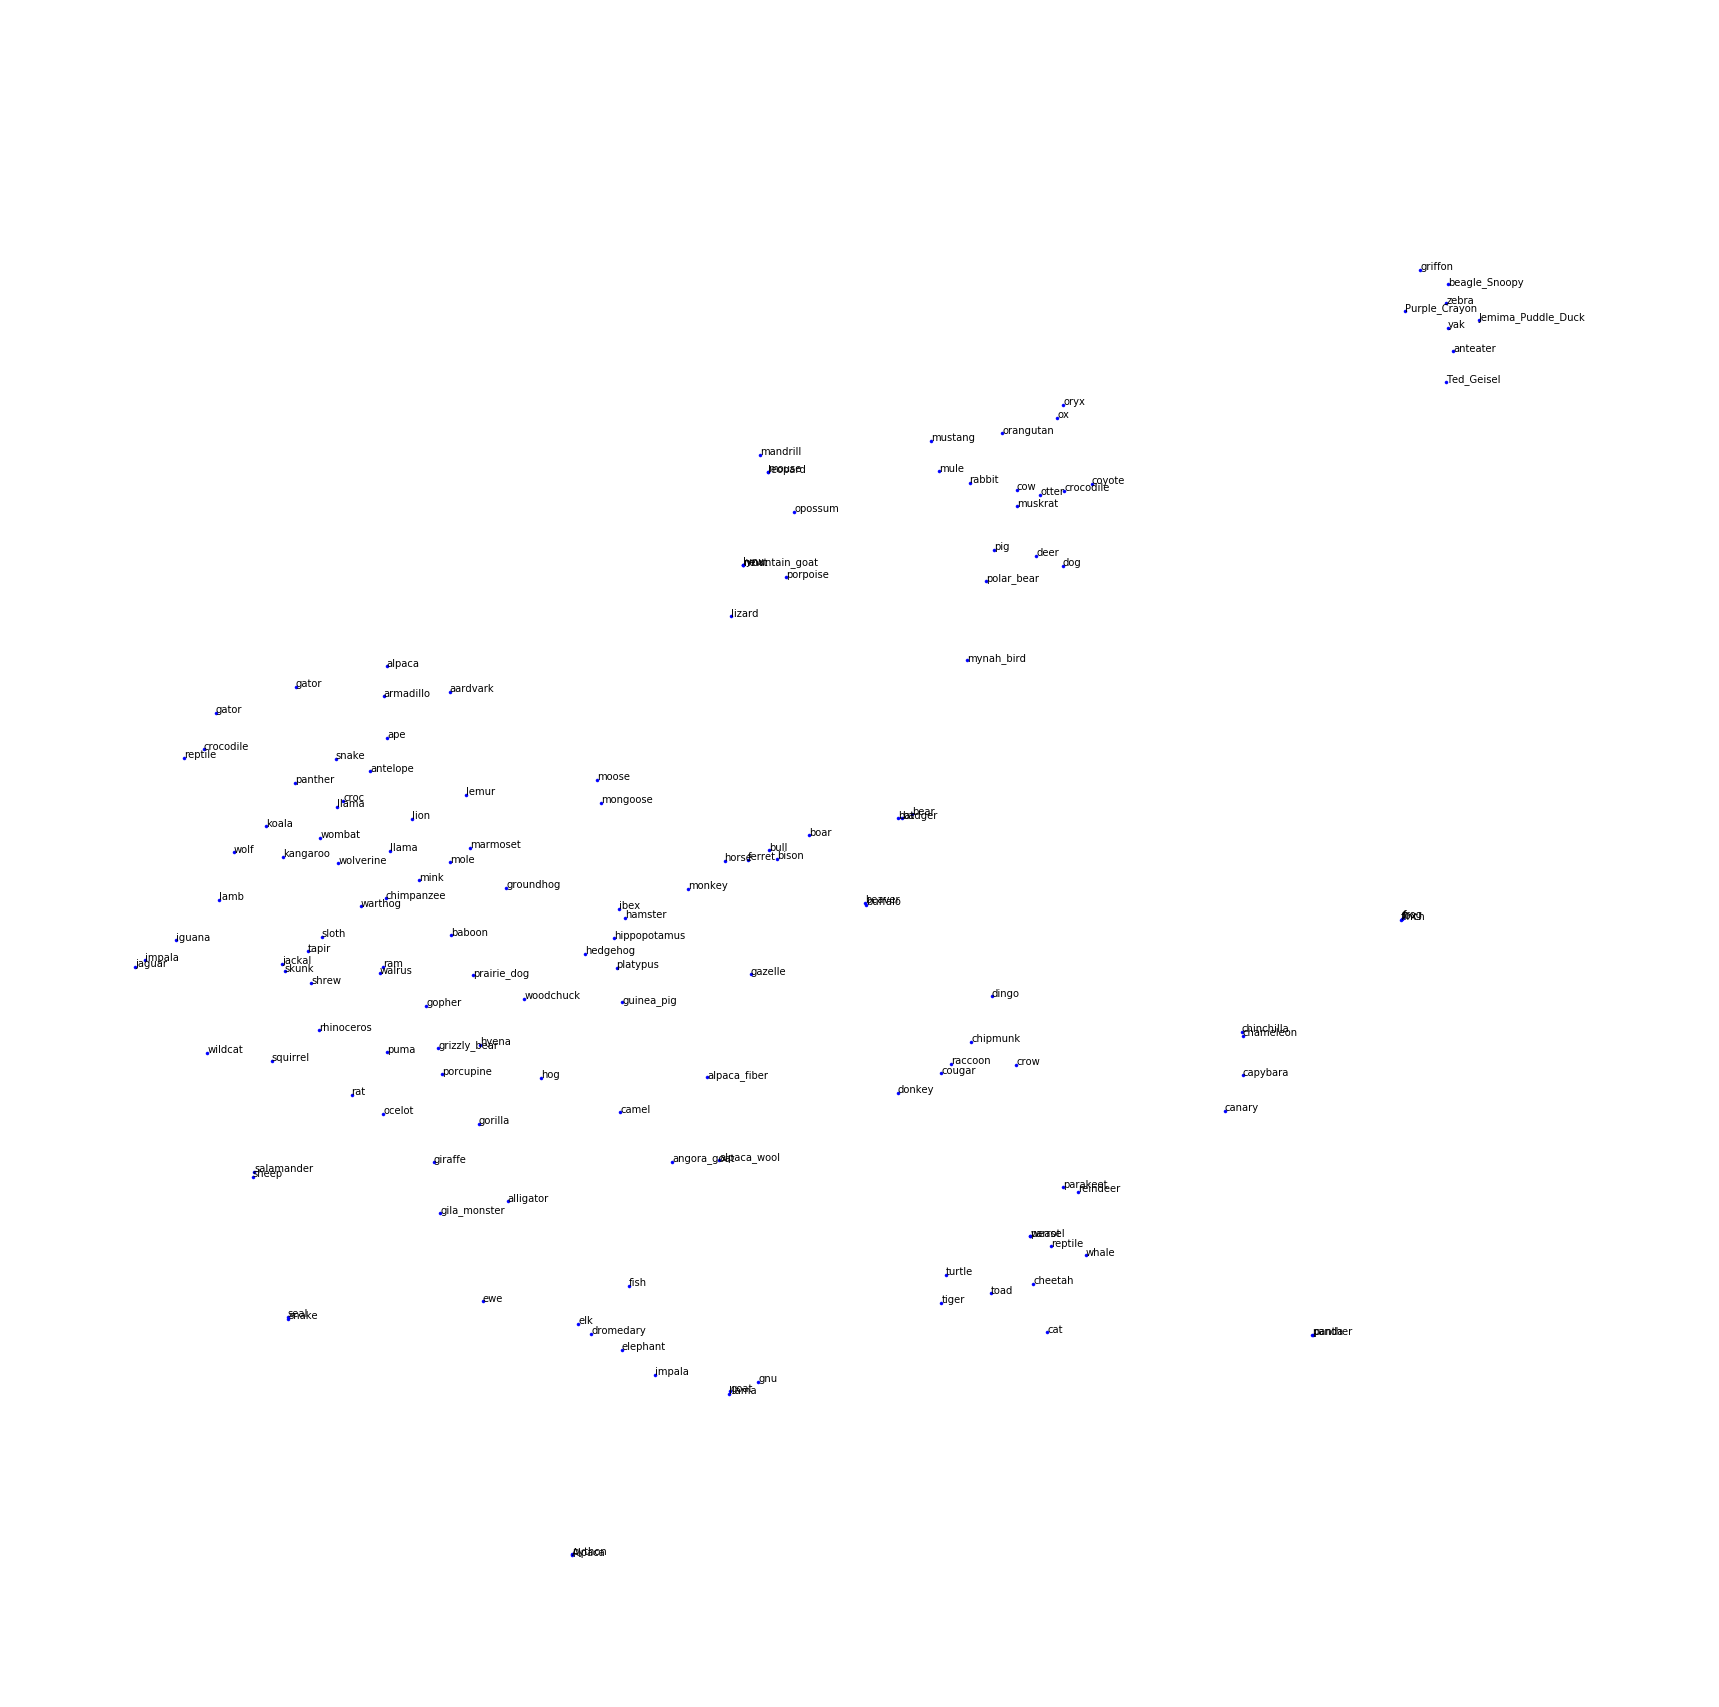

In [206]:
plt.figure(figsize=(30,30))
plt.plot(countries_tsne[:,0], countries_tsne[:,1], '.')
for pt, name in zip(countries_tsne, words):
    plt.annotate(name, pt)
plt.axis('off')
plt.savefig("test.svg", format="svg")
plt.show()

In [207]:
import rasterfairy
#print countries_tsne

num = len(countries_tsne)
arrangements = rasterfairy.getArrangements(num)
masks = rasterfairy.arrangementListToRasterMasks(arrangements)

c = 0
for mask in masks:    
    print c, "Type:",mask['type'],"\tProportion:",mask['width'],"x",mask['height'],"\tHexagonal:",mask['hex']
    c += 1
    
rasterMask = masks[0]
grid_xy, (width,height) = rasterfairy.transformPointCloud2D(countries_tsne,target=rasterMask)

0 Type: symmetric 	Proportion: 15 x 15 	Hexagonal: True
1 Type: alternating 	Proportion: 10 x 17 	Hexagonal: False
2 Type: alternating 	Proportion: 18 x 9 	Hexagonal: False
3 Type: alternating 	Proportion: 6 x 31 	Hexagonal: False
4 Type: alternating 	Proportion: 32 x 5 	Hexagonal: False
5 Type: symmetric 	Proportion: 33 x 5 	Hexagonal: True
6 Type: alternating 	Proportion: 4 x 51 	Hexagonal: False
7 Type: alternating 	Proportion: 52 x 3 	Hexagonal: False
8 Type: alternating 	Proportion: 53 x 3 	Hexagonal: True
9 Type: alternating 	Proportion: 3 x 103 	Hexagonal: True


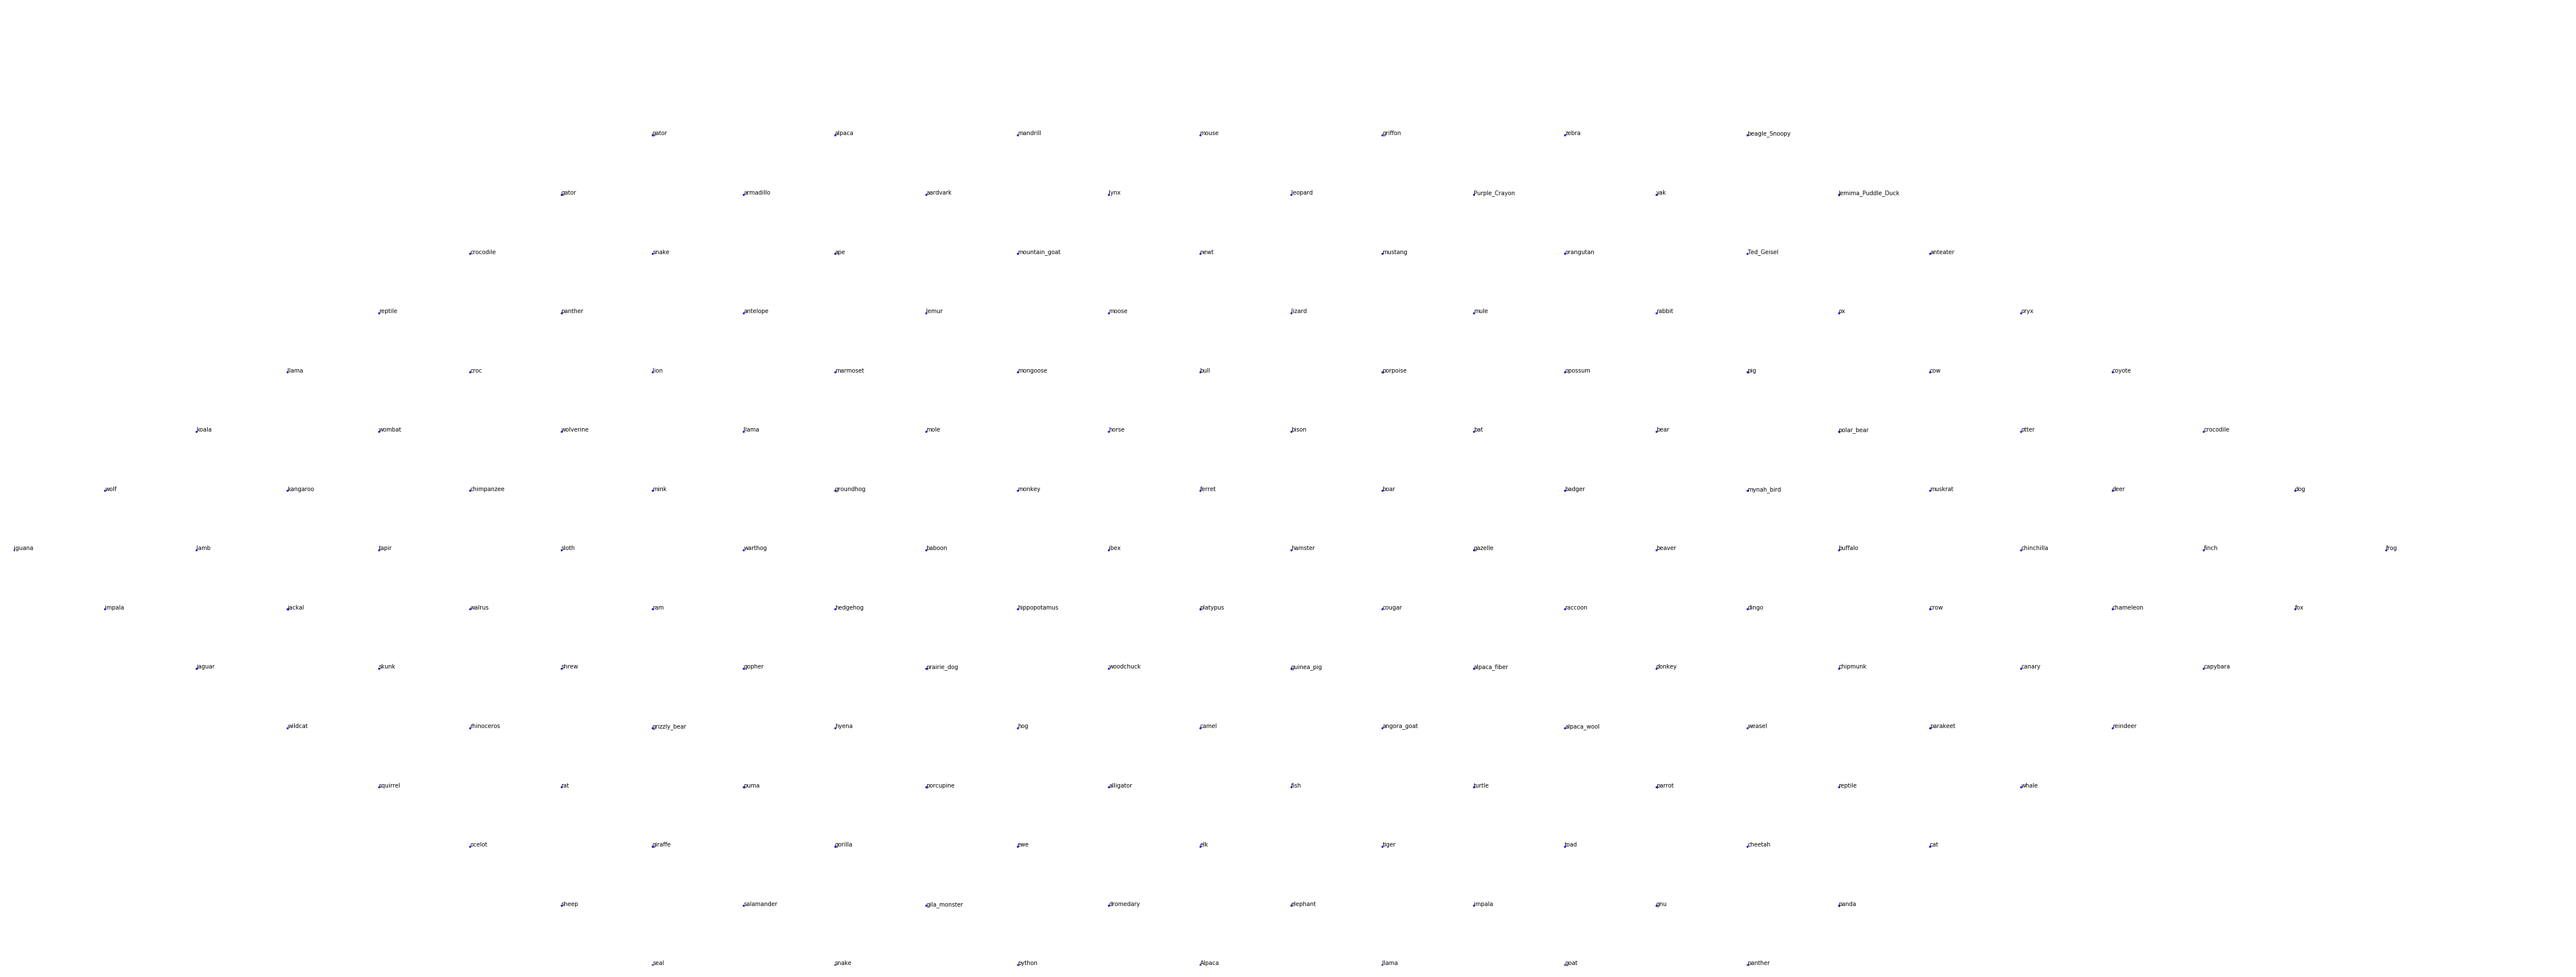

In [208]:

plt.figure(figsize=(80,30))
plt.plot(grid_xy[:,0], grid_xy[:,1], '.')
for pt, name in zip(grid_xy, words):
    plt.annotate(name, pt)
plt.axis('off')
plt.savefig("test.svg", format="svg")
plt.show()

wörter verbinden. die k nächsten
sätze anzeigen. constellations
